<a href="https://colab.research.google.com/github/Neh2332/Python-Finance-using-Stock-Market/blob/main/Predicting_Stock_Prices_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
!pip install yfinance
import math
import numpy as np
import pandas as pd
import yfinance as yfin
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use('ggplot')
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
yfin.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# load the data from Yahoo Finance
start = dt.datetime(2022,1,1)
end = dt.datetime(2023,1,16)
#Dataframe web reader of the ticker
df = pdr.get_data_yahoo('BMO', start, end)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# select the 'Adj Close' column as the target variable
data = df.filter(['Adj Close'])

# convert the dataframe to a numpy array
dataset = data.values

# normalize the data using the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
# split the data into training and test sets
training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:training_data_len, :]

In [ ]:
# create the training dataset
# use the previous 60 days' closing prices to predict

x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.61308006, 0.66586099, 0.63270728, 0.67912277, 0.72686439,
       0.718377  , 0.78309338, 0.82446956, 0.85231903, 0.85550174,
       0.86902845, 0.83375257, 0.81279945, 0.74887869, 0.70670689,
       0.75657045, 0.78521534, 0.73906519, 0.72368146, 0.75478825,
       0.79761995, 0.85999372, 0.84286108, 0.83670388, 0.85785216,
       0.89024355, 0.9108565 , 0.91487215, 0.88836966, 0.85356927,
       0.86909547, 0.88194522, 0.82117767, 0.79815571, 0.7954784 ,
       0.75639426, 0.70151645, 0.78691197, 0.77406265, 0.76121291,
       0.85410439, 0.84419963, 0.80110026, 0.69857169, 0.69509137,
       0.80083259, 0.79815571, 0.81662647, 0.83054709, 0.83911352,
       0.92076126, 0.94592499, 0.97108871, 0.97430115, 1.        ,
       0.87739423, 0.90496718, 0.93093391, 0.91808438, 0.9178165 ])]
[0.9033609593214473]



In [ ]:
model = Sequential()
model.add(LSTM(500, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(500, return_sequences=False))
model.add(Dense(250))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
145/145 [==============================] - 62s 405ms/step - loss: 0.0173
Epoch 2/5
145/145 [==============================] - 59s 408ms/step - loss: 0.0075
Epoch 3/5
145/145 [==============================] - 61s 422ms/step - loss: 0.0048
Epoch 4/5
145/145 [==============================] - 58s 403ms/step - loss: 0.0038
Epoch 5/5
145/145 [==============================] - 58s 401ms/step - loss: 0.0033


In [ ]:
#Create the Testing Dataset
#Create a new array containing scaled values from 141 to 251
test_data = scaled_data[training_data_len - 60:, :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [ ]:
#Convert the data to a numpy array

x_test = np.array(x_test)

In [ ]:
#Reshape x test
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
#Get the model predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 2s 282ms/step


In [ ]:
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print('RMSE:', rmse)

RMSE: 2.049480321754814


<ipython-input-29-9d5043e8cc73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


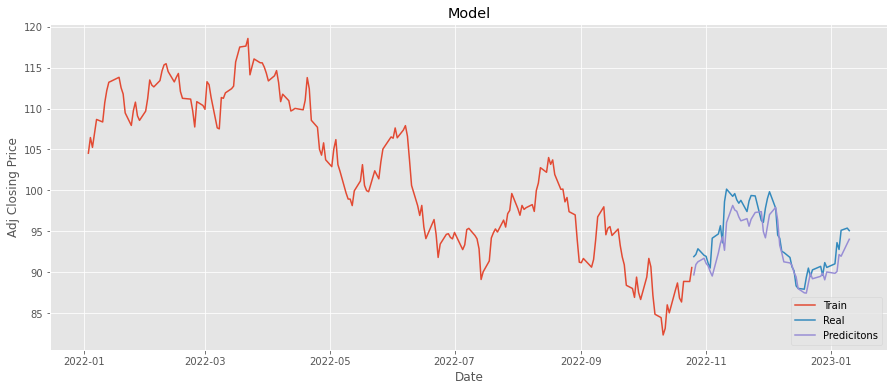

In [ ]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize
plt.figure(figsize=(15,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Adj Closing Price')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Real', 'Predicitons'], loc='lower right')
plt.show()

In [ ]:
valid

,Adj Close,Predictions
Date,,
2022-10-26,91.918556,89.696671
2022-10-27,92.185616,90.955803
2022-10-28,92.877998,91.288254
2022-10-31,92.080002,91.717560
2022-11-01,91.949997,91.095596
2022-11-02,91.110001,90.776138
2022-11-03,90.529999,90.097710
2022-11-04,94.169998,89.552391
2022-11-07,94.690002,92.372200
